# Uncertainties in Maximum Likelihood Method
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) PDF for the outcome of the experiment

Mean and sigma from 10 measurements

In [2]:
Np=10

# True values
x0 = 1
sigma0 = 2
   
# Log-PDF function for outcome mu,sig  of the experiment

def mylpdf(mu, sig):
    
    mull = -Np/2/sigma0**2 * (mu-x0)**2  # Gaus distribution for mu
    nsig2 = Np*sig*sig/sigma0/sigma0
    k = (Np-1)/2
    sigll = (k-1) * np.log(nsig2) - 0.5*nsig2  # Gamma distribution for sigma
    
# Additional log(sig) from changing variables \sigma^2 -> \sigma

    return mull + sigll + np.log(sig)
    


### (2) Define point grid

In [5]:
# Grid for mean

Xmin= -2
Xmax=  4
dX = 0.1

Xrange = np.arange(Xmin,Xmax,dX)

# Grid for sigma 

Smin=  0.05
Smax=  5.0
dS = 0.05

Srange = np.arange(Smin,Smax,dS)

In [6]:
# 2D grid

Sgrid, Xgrid = np.meshgrid(Srange,Xrange)

Nx = Xrange.size
Ns = Srange.size
ND = Nx*Ns 

LPval = np.empty(Xgrid.shape)

# Loop over 2D grid
    
for i in range(Nx):
    for j in range(Ns):

        x = Xgrid[i,j]  
        s = Sgrid[i,j]  
    
        LPval[i,j] = mylpdf(x,s)

### (3) Plot results

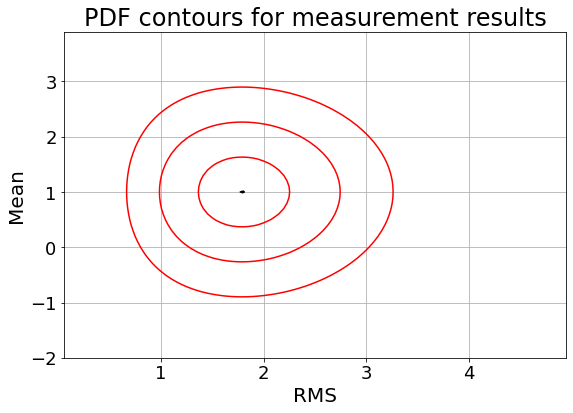

In [10]:
# Create result graph

LPmax = np.max(LPval)

plt.figure(figsize=(9, 6))

plt.contour(Sgrid,Xgrid,LPval, levels=[LPmax-4.5,LPmax-2.,LPmax-0.5,LPmax-0.002],colors=['#FF0000', '#FF0000', '#FF0000', '#000000'])

plt.title("PDF contours for measurement results",size=24)
plt.xlabel('RMS',size=20)
plt.ylabel('Mean',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '06_mlm_func2.png'
plt.savefig(fname)

plt.show()